<div dir="rtl" style="border-radius:12px;padding:16px;background:#f8fafc;border:1px solid #dbeafe;
font-family:Vazirmatn, Segoe UI, Tahoma;line-height:1.9;text-align:center">

<h2 style="color:#1e3a8a;margin-bottom:6px">Time Series Behavior and ARIMA Forecasting</h2>


</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox
from sklearn.metrics import mean_absolute_error, mean_squared_error

<div dir="rtl" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
    بارگذاری داده ها
  </div>
</div>


In [3]:
data_path = "ADANIPORTS.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])
df = df.set_index('Date') #changing the index
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
df.shape

(3322, 14)

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Exploratory Data Analysis
  </div>
  <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Statistical summary of numerical variables  </div>
</div>


In [5]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prev Close,"3,322.00",344.11,192.94,108.00,164.31,324.70,400.91,"1,307.45"
Open,"3,322.00",344.76,193.62,108.00,164.85,325.75,401.00,"1,310.25"
High,"3,322.00",351.61,198.62,110.45,168.00,331.27,407.19,"1,324.00"
Low,"3,322.00",337.53,188.68,105.65,161.60,319.85,395.00,"1,270.00"
Last,"3,322.00",344.24,193.19,108.00,164.07,325.00,400.91,"1,308.00"
Close,"3,322.00",344.20,193.05,108.00,164.31,324.70,400.91,"1,307.45"
VWAP,"3,322.00",344.85,193.84,108.34,164.86,325.76,400.61,"1,302.15"
Volume,"3,322.00","2,954,563.92","4,104,226.70","12,366.00","749,368.25","2,007,292.50","3,636,883.00","97,717,880.00"
Turnover,"3,322.00","107,014,414,372,915.41","262,556,381,457,641.19","241,585,705,000.00","18,176,504,280,000.00","58,360,414,462,500.00","115,852,559,914,999.98","8,160,988,307,835,002.00"
Trades,"2,456.00","44,922.59","50,231.24",366.00,"20,832.00","35,881.50","53,368.75","1,205,984.00"


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Missing Data Handling
  </div>
  <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Missing Values:  </div>
</div>

In [6]:
df.isna().sum()


Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Outlier detection using the IQR method:
</div>
</div>

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_counts[col] = int(((df[col] < lower) | (df[col] > upper)).sum())

outlier_counts


{'Prev Close': 123,
 'Open': 126,
 'High': 130,
 'Low': 117,
 'Last': 120,
 'Close': 123,
 'VWAP': 131,
 'Volume': 189,
 'Turnover': 209,
 'Trades': 124,
 'Deliverable Volume': 170,
 '%Deliverble': 11}

In [8]:
#summary of results 
summary = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Outliers Count": pd.Series(outlier_counts),
    "Outliers %": (pd.Series(outlier_counts)/df.count())*100
})
summary

,Missing Count,Outliers Count,Outliers %
%Deliverble,0,11.00,0.33
Close,0,123.00,3.70
Deliverable Volume,0,170.00,5.12
High,0,130.00,3.91
Last,0,120.00,3.61
Low,0,117.00,3.52
Open,0,126.00,3.79
Prev Close,0,123.00,3.70
Series,0,NaN,NaN
Symbol,0,NaN,NaN


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
We select VWAP as the main time-series variable, and since it contains no missing values, we only address the outliers associated with this variable.    <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
ما VWAP را به‌عنوان متغیر اصلی سری زمانی انتخاب می‌کنیم و از آن‌جا که این متغیر هیچ مقدار گمشده‌ای ندارد، تنها مقادیر پرت مربوط به همین متغیر را مورد بررسی و اصلاح قرار می‌دهیم.    
</div>
</div>

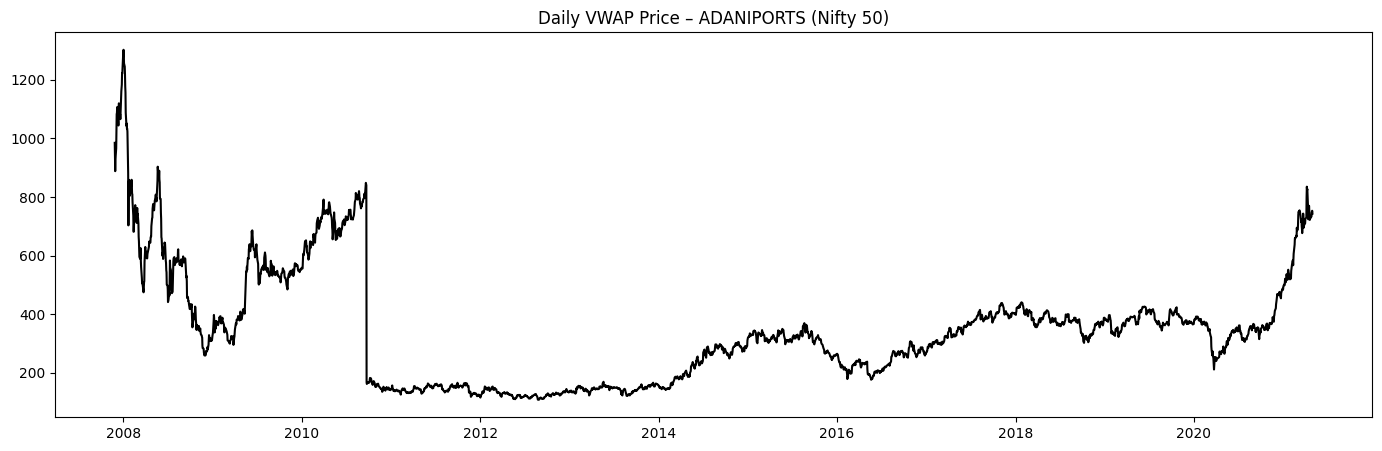

In [9]:
#Visualization of the VWAP
plt.rcParams['figure.figsize']=(17,5)
plt.plot(df['VWAP'],color='black')
plt.title("Daily VWAP Price – ADANIPORTS (Nifty 50)")
plt.show()

<Axes: ylabel='VWAP'>

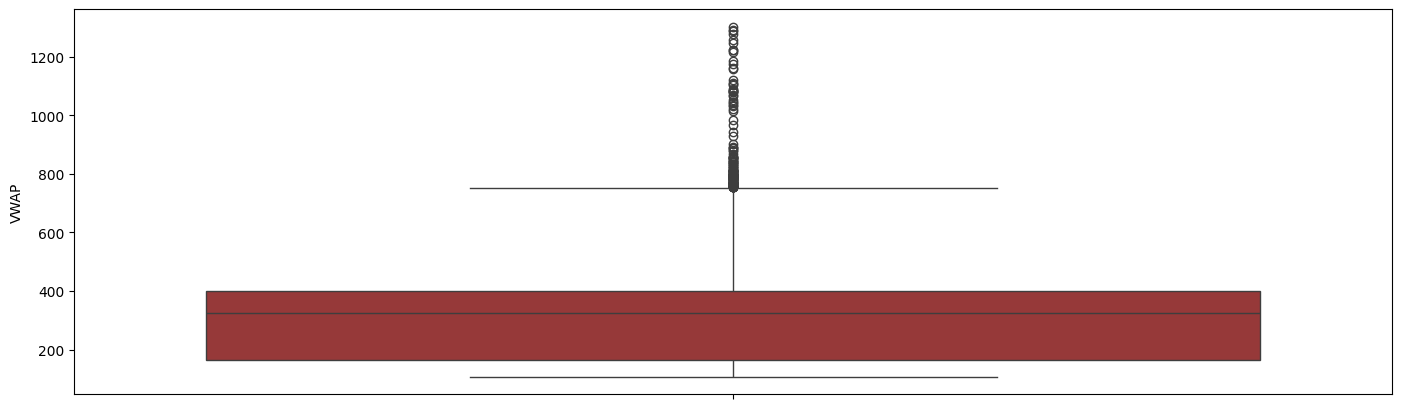

In [10]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(df['VWAP'], color='brown')

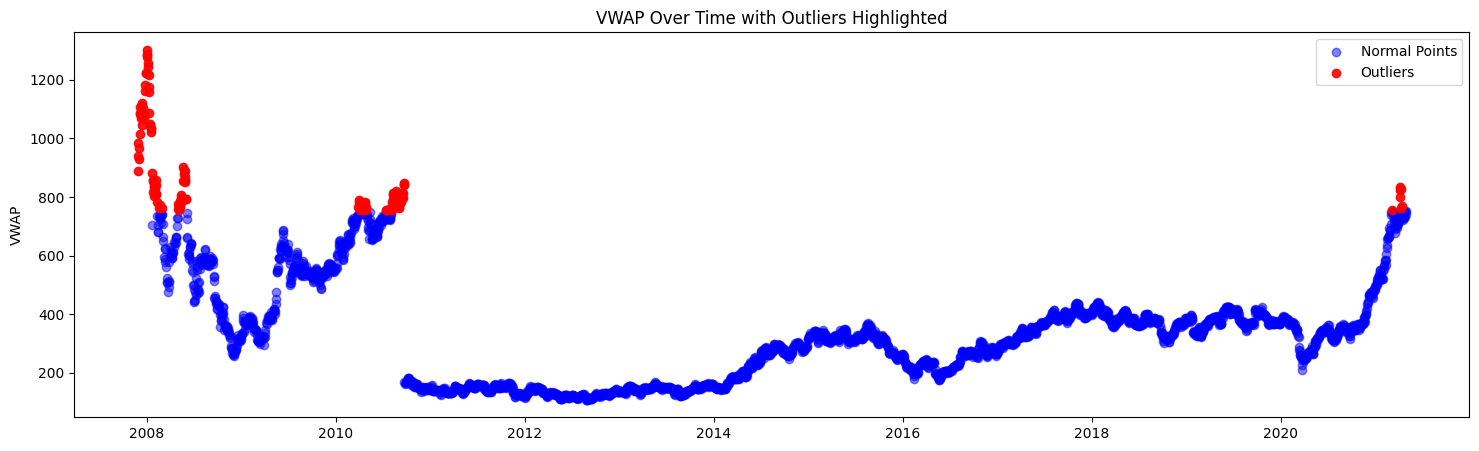

In [11]:
# Calculate outlier thresholds using IQR
Q1 = df['VWAP'].quantile(0.25)
Q3 = df['VWAP'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outlier points
outliers = (df['VWAP'] < lower) | (df['VWAP'] > upper)

plt.figure(figsize=(18,5))

# Normal points
plt.scatter(df.index[~outliers], df['VWAP'][~outliers],
            color='blue', alpha=0.5, label='Normal Points')

# Outlier points
plt.scatter(df.index[outliers], df['VWAP'][outliers],
            color='red', alpha=0.9, label='Outliers')

plt.title('VWAP Over Time with Outliers Highlighted')
plt.ylabel('VWAP')
plt.legend()
plt.show()


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Based on the visual inspection of the scatterplot, the apparent VWAP outliers form clear clusters within specific time periods and align with the underlying price trend, rather than behaving like random spikes or recording errors. This indicates that these points are part of the market’s actual regime, not faulty data. Therefore, the appropriate approach is to avoid deletion or median replacement, and instead apply a mild Winsorization (clip) to soften the influence of the most extreme values without distorting the historical price structure.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
بر اساس بررسی بصری نمودار پراکنش، مقادیر ظاهراً پرتِ VWAP در دوره‌های زمانی مشخص به‌صورت خوشه‌ای ظاهر می‌شوند و با روند زیرین قیمت هم‌راستا هستند؛ نه اینکه مانند جهش‌های تصادفی یا خطاهای ثبت رفتار کنند. این موضوع نشان می‌دهد که این نقاط بخشی از رژیم واقعی بازار هستند و دادهٔ معیوب محسوب نمی‌شوند.

بنابراین، روش مناسب این است که از حذف یا جایگزینی با میانه خودداری کنیم و در عوض، یک وینسوریزیشن (برش) ملایم اعمال کنیم تا اثر شدیدترین مقادیر کاهش یابد بدون آن‌که ساختار تاریخی قیمت دچار تغییر یا اعوجاج شود.</div>
</div>

In [12]:
Q1 = df['VWAP'].quantile(0.25)
Q3 = df['VWAP'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['VWAP_clean'] = df['VWAP'].clip(lower, upper)


<Axes: ylabel='VWAP_clean'>

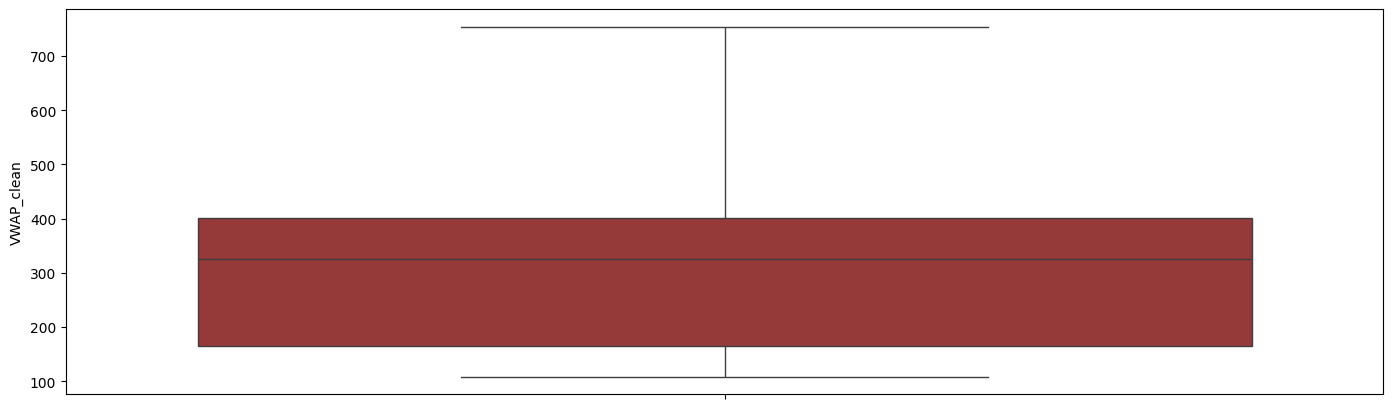

In [13]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(df['VWAP_clean'], color='brown')

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Time series trend and pattern analysis
  </div>
  <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Moving Average:  </div>
</div>


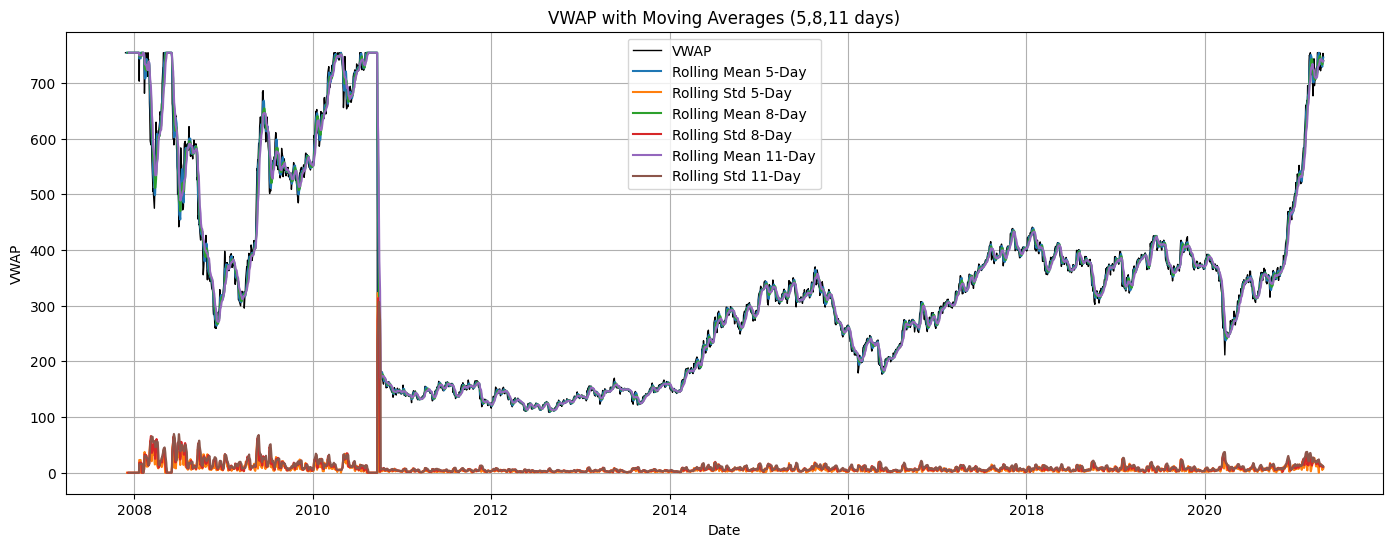

In [14]:

vwap_series = df['VWAP_clean'].copy()

ma_table = pd.DataFrame()
ma_table['VWAP'] = vwap_series

# Moving Average 5 to 7
for window in range(5, 12,3):
    ma_table[f'MA_{window}'] = vwap_series.rolling(window=window).mean()
    ma_table[f'MA-std_{window}'] = vwap_series.rolling(window=window).std()

plt.figure(figsize=(17,6))

plt.plot(ma_table['VWAP'], label='VWAP', color='black', linewidth=1)

for window in range(5, 12,3):
    plt.plot(ma_table[f'MA_{window}'], label=f'Rolling Mean {window}-Day')
    plt.plot(ma_table[f'MA-std_{window}'], label=f'Rolling Std {window}-Day')

plt.title("VWAP with Moving Averages (5,8,11 days)")
plt.xlabel("Date")
plt.ylabel("VWAP")
plt.grid(True)
plt.legend()
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Median Moving Average:
</div>
</div>

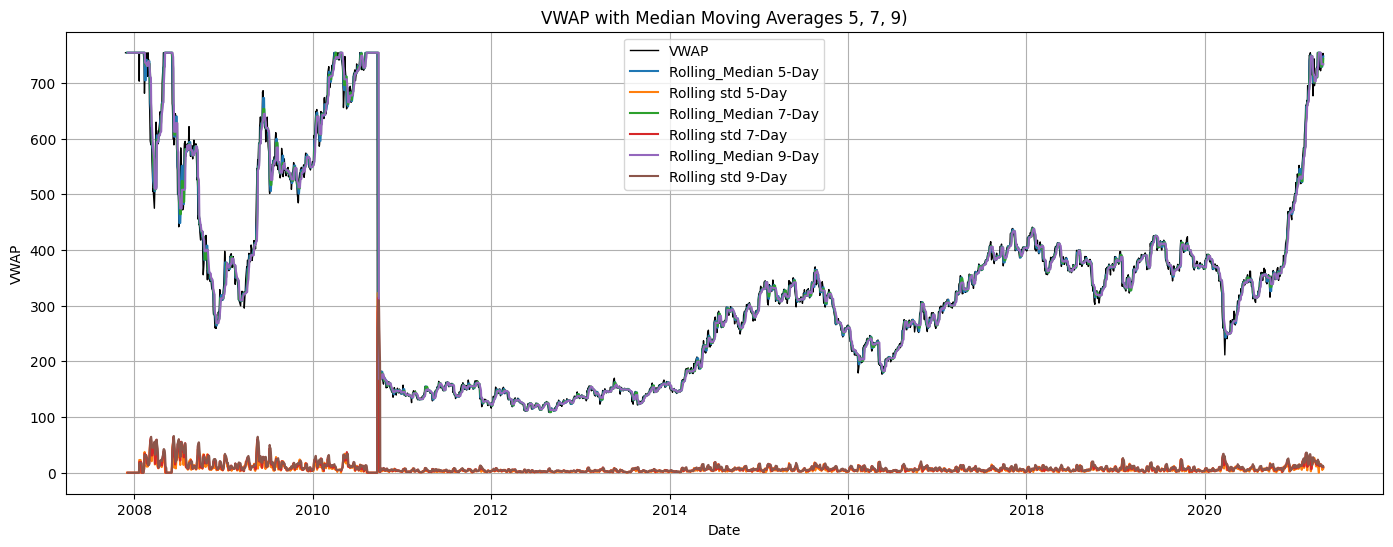

In [15]:
vwap_series = df['VWAP_clean'].copy()

median_table = pd.DataFrame()
median_table['VWAP'] = vwap_series


for window in [5, 7, 9]:
    median_table[f'Rolling_Median_{window}'] = vwap_series.rolling(window=window).median()
    median_table[f'Rolling_std_{window}'] = vwap_series.rolling(window=window).std()


plt.figure(figsize=(17,6))


plt.plot(median_table['VWAP'], label='VWAP', color='black', linewidth=1)


for window in [5, 7, 9]:
    plt.plot(median_table[f'Rolling_Median_{window}'], label=f'Rolling_Median {window}-Day')
    plt.plot(median_table[f'Rolling_std_{window}'], label=f'Rolling std {window}-Day')

plt.title("VWAP with Median Moving Averages 5, 7, 9)")
plt.xlabel("Date")
plt.ylabel("VWAP")
plt.grid(True)
plt.legend()
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
weighted_moving_average:
</div>
</div>

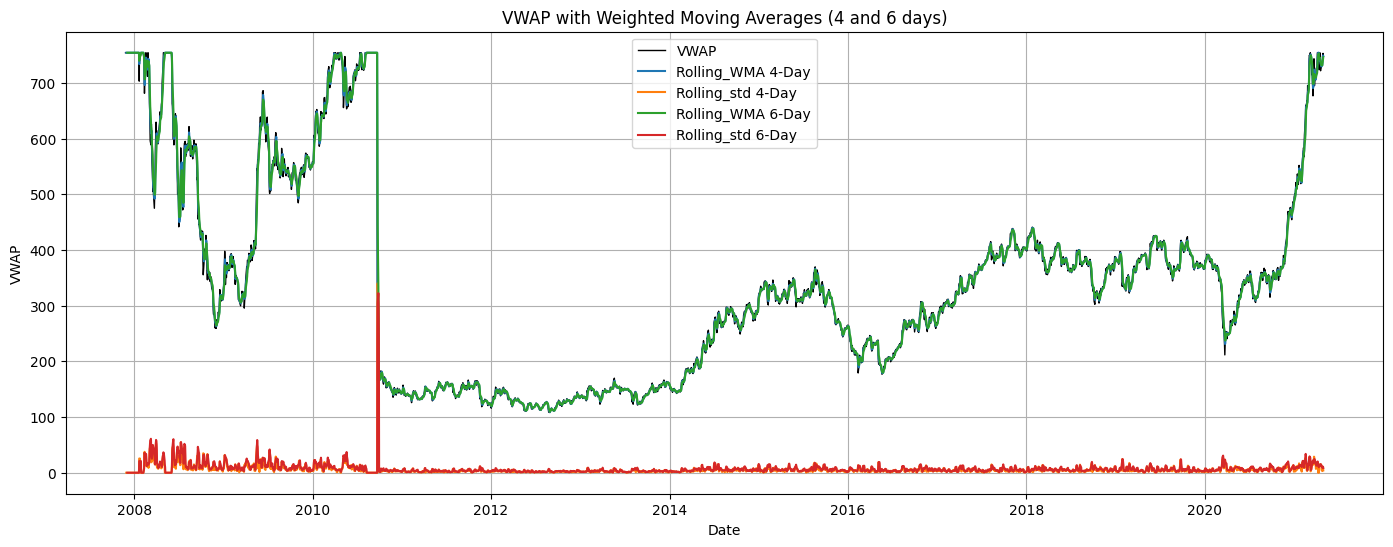

In [16]:
vwap_series = df['VWAP_clean'].copy()

wma_table = pd.DataFrame()
wma_table['VWAP'] = vwap_series


def weighted_moving_average(series, window):
    weights = np.arange(1, window + 1) 
    return series.rolling(window).apply(
        lambda prices: np.dot(prices, weights) / weights.sum(),
        raw=True
    )


windows = [4, 6]


for window in windows:
    wma_table[f'Rolling_WMA_{window}'] = weighted_moving_average(vwap_series, window)
    wma_table[f'Rolling_std_{window}'] = vwap_series.rolling(window=window).std()



plt.figure(figsize=(17,6))

plt.plot(wma_table['VWAP'], label='VWAP', color='black', linewidth=1)

for window in windows:
    plt.plot(wma_table[f'Rolling_WMA_{window}'], label=f'Rolling_WMA {window}-Day')
    plt.plot(wma_table[f'Rolling_std_{window}'], label=f'Rolling_std {window}-Day')

plt.title("VWAP with Weighted Moving Averages (4 and 6 days)")
plt.xlabel("Date")
plt.ylabel("VWAP")
plt.grid(True)
plt.legend()
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Simple Exponential Smoothing:
</div>
</div>

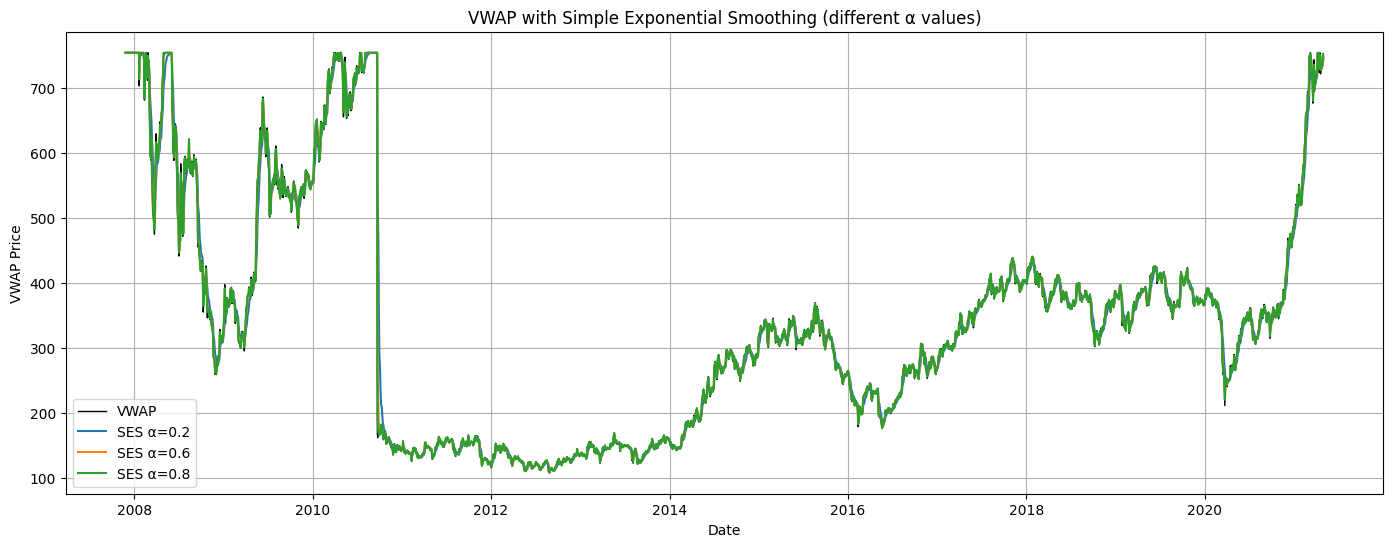

In [17]:
vwap_series = df['VWAP_clean'].copy()

ses_table = pd.DataFrame()
ses_table['VWAP'] = vwap_series


alphas = [0.2, 0.6, 0.8]

for alpha in alphas:
    ses_table[f'SES_{alpha}'] = vwap_series.ewm(alpha=alpha, adjust=False).mean()


plt.figure(figsize=(17,6))

plt.plot(ses_table['VWAP'], label='VWAP', color='black', linewidth=1)


for alpha in alphas:
    plt.plot(ses_table[f'SES_{alpha}'], label=f'SES α={alpha}')

plt.title("VWAP with Simple Exponential Smoothing (different α values)")
plt.xlabel("Date")
plt.ylabel("VWAP Price")
plt.grid(True)
plt.legend()
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Time Series Decomposition
  </div>


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
In time series decomposition, we aim to separate the data into trend, seasonal patterns, and random noise to understand the contribution of each component to the overall behavior of the series.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
در تجزیهٔ سری زمانی، هدف ما این است که داده را به سه بخشِ روند، الگوهای فصلی و نویز تصادفی تفکیک کنیم تا سهم هر یک از این مؤلفه‌ها در رفتار کلی سری زمانی را بهتر درک کنیم.
</div>
</div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
We used the ACF plot to check whether the time series exhibits any seasonal or periodic autocorrelation patterns.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
ما از نمودار ACF برای بررسی این‌که آیا سری زمانی الگوهای خودهمبستگی فصلی یا تناوبی دارد یا خیر استفاده کردیم.</div>
</div>

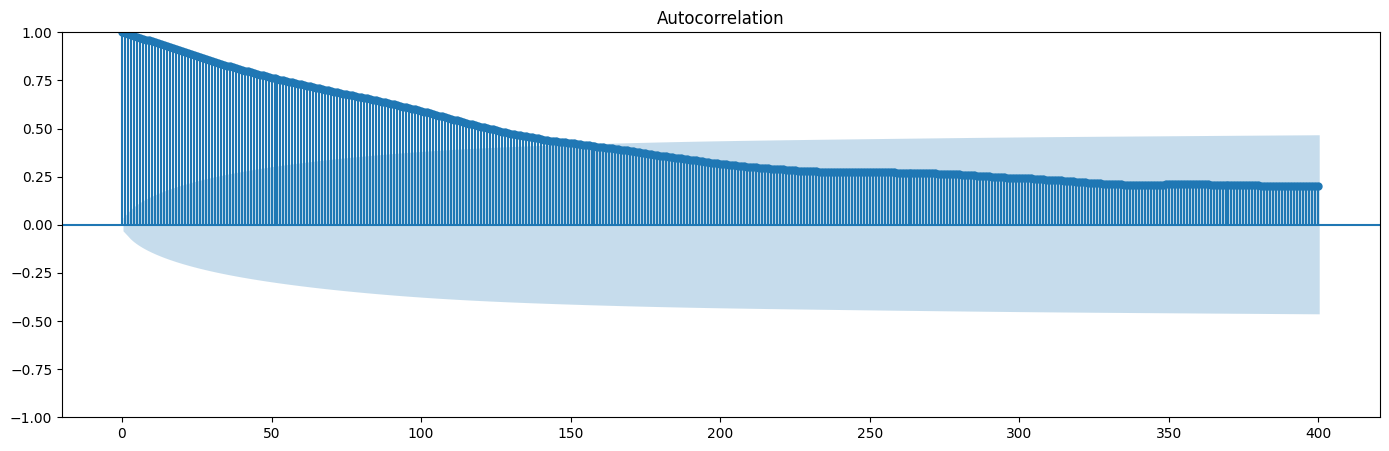

In [18]:
plot_acf(df['VWAP_clean'], lags=400)
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Based on the ACF plot, the VWAP time series shows no clear seasonal peaks, indicating that meaningful seasonality is not present. However, for performing time series decomposition—and considering the nature of financial markets and the typical number of trading days in a year—period = 252 was selected as the appropriate seasonal period. In addition, an additive decomposition model was chosen because the amplitude of the seasonal and residual components does not scale with the level of the series. In other words, the fluctuations remain relatively constant in magnitude across different price levels, which is consistent with an additive structure rather than a multiplicative one.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
بر اساس نمودار ACF، سری زمانی VWAP هیچ قلهٔ فصلی مشخصی را نشان نمی‌دهد و این موضوع نشان می‌دهد که فصلیت معناداری در داده وجود ندارد.
با این حال، برای انجام تجزیهٔ سری زمانی—و با توجه به ماهیت بازارهای مالی و تعداد معمول روزهای معاملاتی در یک سال—عدد ۲۵۲ به‌عنوان دورهٔ فصلی مناسب انتخاب شد.

همچنین، مدل تجزیهٔ جمعی (Additive) انتخاب شد، زیرا دامنهٔ نوسانات مؤلفه‌های فصلی و باقیمانده با سطح سری زمانی افزایش یا کاهش نمی‌یابد. به بیان دیگر، مقدار نوسانات در سطوح مختلف قیمت نسبتاً ثابت است، که این ویژگی با ساختار جمعی سازگار است و نه با ساختار ضربی (Multiplicative).</div>
</div>

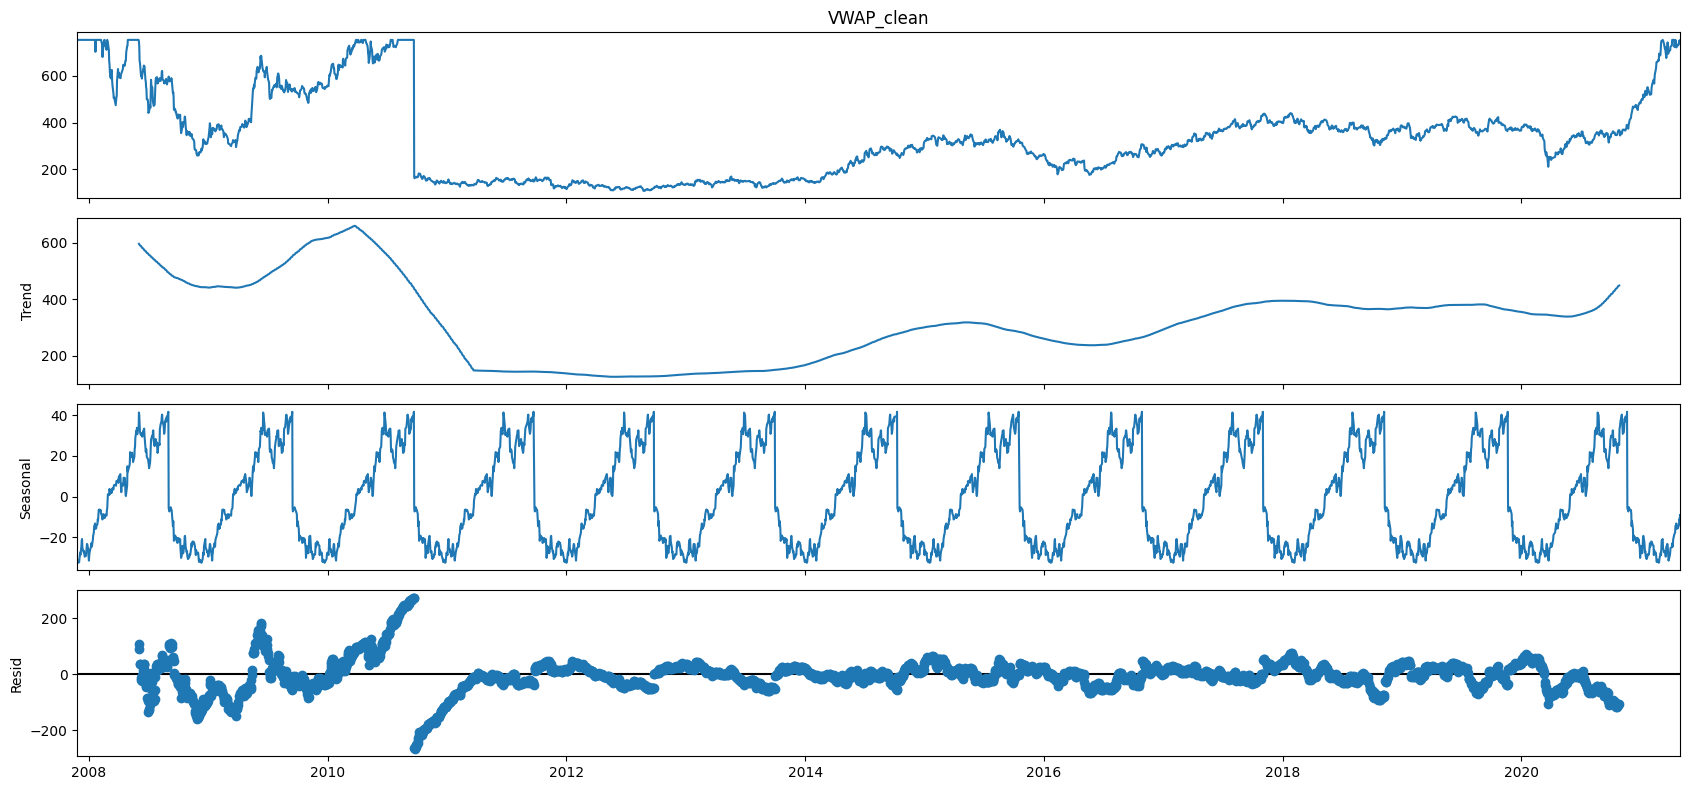

In [19]:
plt.rcParams['figure.figsize'] = (17, 8)

decomposition = sm.tsa.seasonal_decompose(
    df['VWAP_clean'],
    model='additive',
    period=252
)
decomposition.plot()
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
After applying Seasonal Decomposition with period = 252 (based on the number of trading days in a year), the three components—Trend, Seasonality, and Residual—were successfully separated from the VWAP series. The extracted trend aligns closely with the long-term structural behavior of the data. The seasonal component displays a low-amplitude, repeating pattern, which is consistent with the nature of financial time series. The residuals show no systematic structure and primarily capture the random fluctuations of the market. This outcome confirms both the correctness of choosing period = 252 and the suitability of employing an additive decomposition model for the VWAP series.  
        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
پس از اعمال تجزیهٔ فصلی با دورهٔ ۲۵۲ (بر اساس تعداد روزهای معاملاتی در یک سال)، سه مؤلفهٔ روند، فصلیّت و باقیمانده با موفقیت از سری VWAP جدا شدند. روند استخراج‌شده با رفتار ساختاری بلندمدت داده هماهنگی نزدیکی دارد. مؤلفهٔ فصلی نیز یک الگوی تکرارشونده با دامنهٔ کم را نشان می‌دهد که با ماهیت سری‌های زمانی مالی سازگار است. مؤلفهٔ باقیمانده هیچ ساختار سیستماتیکی ندارد و عمدتاً نوسانات تصادفی بازار را ثبت می‌کند.

این نتایج، درستیِ انتخاب دورهٔ ۲۵۲ و مناسب‌بودن مدل تجزیهٔ جمعی را برای سری زمانی VWAP تأیید می‌کند.
</div>
</div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Stationarity
  </div>
  <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">

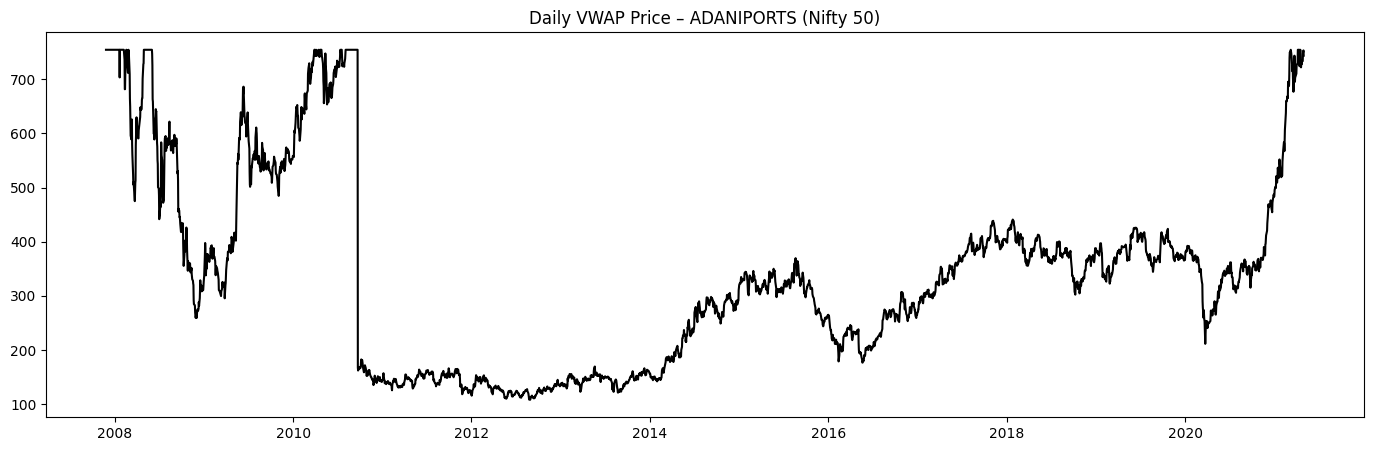

In [20]:
#Visualization of the VWAP
plt.rcParams['figure.figsize']=(17,5)
plt.plot(df['VWAP_clean'],color='black')
plt.title("Daily VWAP Price – ADANIPORTS (Nifty 50)")
plt.show()

In [21]:

adf_result = adfuller(df['VWAP_clean'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -2.3668473589608285
p-value: 0.15131290939438152


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Stationarity Analysis:
        The VWAP price plot shows substantial shifts in the level of the series and several regime changes over time. Therefore, from a visual perspective, the series exhibits a clear trend and is evidently non-stationary. To confirm this statistically, the ADF test was applied. The resulting p-value (0.151) is greater than the 0.05 significance level, meaning that the null hypothesis of a unit root cannot be rejected. This indicates that the series is statistically non-stationary as well. Consequently, for further modeling, the time series must be transformed into a stationary form, typically through differencing or other stationarization techniques. 
        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
تحلیل مانایی:

نمودار قیمت VWAP نشان می‌دهد که سطح سری زمانی دچار جابه‌جایی‌های قابل توجه و چندین تغییر رژیم در طول زمان است. بنابراین، از دید بصری، سری دارای روند بوده و به‌وضوح نامانا است.

برای تأیید آماری این موضوع، آزمون ADF اعمال شد. مقدار p حاصل‌شده (0.151) بزرگ‌تر از سطح معنی‌داری 0.05 است؛ بنابراین فرضیهٔ صفر مبنی بر وجود ریشه واحد رد نمی‌شود. این نتیجه نشان می‌دهد که سری زمانی به‌صورت آماری نیز نامانا است.

در نتیجه، برای مدل‌سازی‌های بعدی، سری زمانی باید به یک فرم مانا تبدیل شود؛ معمولاً از طریق تفاضل‌گیری یا سایر روش‌های ماناسازی.
</div>
</div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">

  <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">

**1. Mean Non-Stationarity (Trend)**  
The series exhibits clear long-term upward and downward movements, indicating shifts in the average level over time. This confirms the presence of trend non-stationarity.
<div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
سری زمانی دارای حرکات صعودی و نزولی بلندمدت است که نشان‌دهندهٔ تغییر سطح میانگین در طول زمان است. این رفتار، وجود نامانایی روند را تأیید می‌کند.


**2. Variance Non-Stationarity (Volatility)**  
The volatility of the series changes across different periods. Some segments display very high fluctuations (e.g., 2008–2010 and post-2020), while others show relatively stable behavior. This pattern reveals variance non-stationarity.
<div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
نوسان‌پذیری سری در دوره‌های مختلف تغییر می‌کند. برخی بخش‌ها (مثلاً ۲۰۰۸–۲۰۱۰ و پس از ۲۰۲۰) دارای نوسانات بسیار شدید هستند، در حالی که بخش‌های دیگر رفتار نسبتاً پایدار دارند. این الگو نشان‌دهندهٔ نامانایی واریانس است.

**3. Seasonal Non-Stationarity**  
No stable or repeating seasonal pattern is observed in the VWAP series. The data does not show periodic cycles that repeat consistently over fixed intervals, indicating the absence of seasonal non-stationarity.
<div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
در سری زمانی VWAP هیچ الگوی فصلی پایدار یا تکرارشونده مشاهده نمی‌شود. داده‌ها چرخه‌های دوره‌ای منظم و ثابت را نشان نمی‌دهند، و این بیانگر عدم وجود نامانایی فصلی است.

  </div>
</div>


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Transforming the time series to stationarity:
</div>
</div>

In [22]:
df['VWAP_log'] = np.log(df['VWAP_clean']) #Logarithmic transform
df['VWAP_pow_05'] = df['VWAP_clean'] ** 0.5 # Power transform
df['VWAP_boxcox'], bc_lambda = boxcox(df['VWAP_clean']) # Box–Cox transform



In [23]:
tests = {
    "Log Transform": 'VWAP_log',
    "Power Transform (0.5)": 'VWAP_pow_05',
    "Box-Cox Transform": 'VWAP_boxcox'
}

for name, col in tests.items():
    stat, p, *_ = adfuller(df[col].dropna())
    print(f"{name}:")
    print(f"  ADF Statistic: {stat}")
    print(f"  p-value: {p}\n")




Log Transform:
  ADF Statistic: -2.0166130285138566
  p-value: 0.2793367046089798

Power Transform (0.5):
  ADF Statistic: -2.1716742942833696
  p-value: 0.21668617415605435

Box-Cox Transform:
  ADF Statistic: -2.0423786647258066
  p-value: 0.2683060457275619



<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Although logarithmic, power, and Box–Cox transformations help stabilize the variance of the VWAP series, none of these transformations are sufficient to make the series stationary. The ADF test results remain above the 0.05 significance threshold, indicating that the primary source of non-stationarity is the underlying trend rather than variance instability. Therefore, differencing must be applied after transformation to fully achieve stationarity.
        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
اگرچه تبدیل‌های لگاریتمی، توانی و باکس–کاکس به تثبیت واریانس سری VWAP کمک می‌کنند، اما هیچ‌یک از این تبدیل‌ها به‌تنهایی برای مانا کردن سری کافی نیستند. نتایج آزمون ADF همچنان بالاتر از آستانهٔ معنی‌داری ۰.۰۵ باقی می‌ماند و نشان می‌دهد که منبع اصلی نامانایی، روند زیرین سری است نه ناپایداری واریانس.
بنابراین، پس از انجام تبدیل، لازم است تفاضل‌گیری نیز اعمال شود تا مانایی کامل حاصل شود.
</div>
</div>

In [24]:
df['VWAP_logdiff'] = df['VWAP_log'].diff()
adfuller(df['VWAP_logdiff'].dropna())


(np.float64(-53.6285693599042),
 0.0,
 0,
 3320,
 {'1%': np.float64(-3.4323211937441576),
  '5%': np.float64(-2.8624109575101833),
  '10%': np.float64(-2.5672336283386556)},
 np.float64(-12739.64089491035))

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
After applying a logarithmic transformation to stabilize the variance, first-order differencing was applied to remove long-term trends in the VWAP series. The ADF test on the log-differenced series produced an ADF statistic of -53.63 and a p-value of 0.0000, which is far below the 0.05 threshold. This confirms that the transformed series is strongly stationary and is suitable for ARIMA-family modeling.
    <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
      پس از اعمال تبدیل لگاریتمی برای تثبیت واریانس، تفاضل‌گیری مرتبهٔ اول به‌منظور حذف روندهای بلندمدت در سری VWAP انجام شد. آزمون ADF بر روی سری لگاریتم‌شده و تفاضل‌گیری‌شده مقدار آمارهٔ -53.63 و مقدار p برابر با 0.0000 را نشان داد که بسیار کمتر از آستانهٔ 0.05 است. این نتیجه تأیید می‌کند که سریِ تبدیل‌یافته به‌شدت ایستا است و برای مدل‌سازی با خانوادهٔ مدل‌های ARIMA مناسب می‌باشد.
    
</div>
</div>

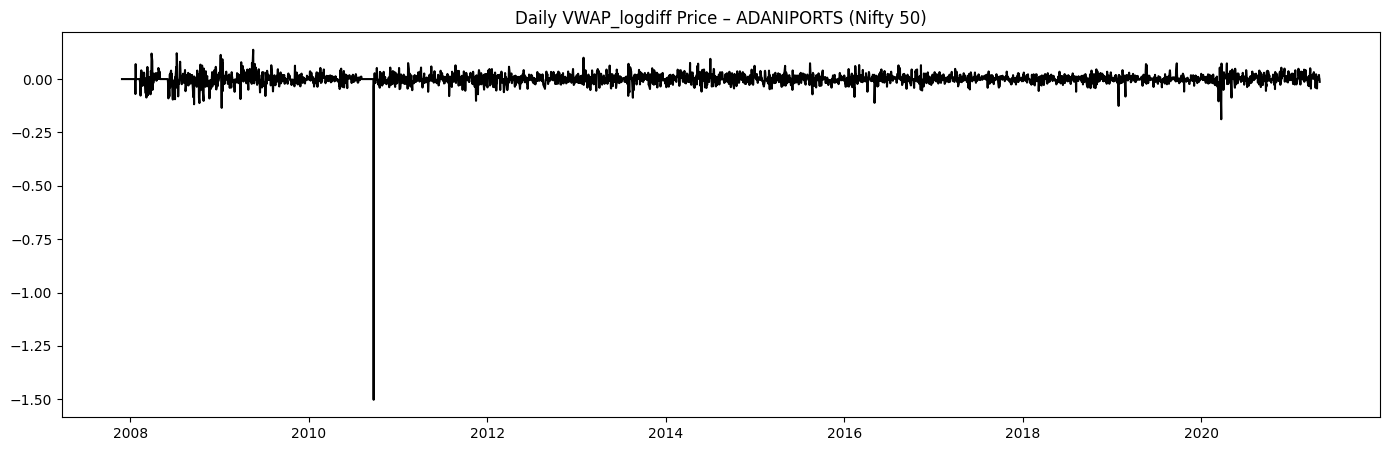

In [25]:
#Visualization of the VWAP
plt.rcParams['figure.figsize']=(17,5)
plt.plot(df['VWAP_logdiff'],color='black')
plt.title("Daily VWAP_logdiff Price – ADANIPORTS (Nifty 50)")
plt.show()

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Modeling
  </div>


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
We now have the stationary series df['VWAP_logdiff']. Before starting the modeling process, we determine the p and q parameters.    <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
ما سری ایستا شده‌ی df['VWAP_logdiff'] را داریم. قبل از شروع مدل‌سازی، پارامترهای p و q را تعیین می‌کنیم.    
</div>
</div>

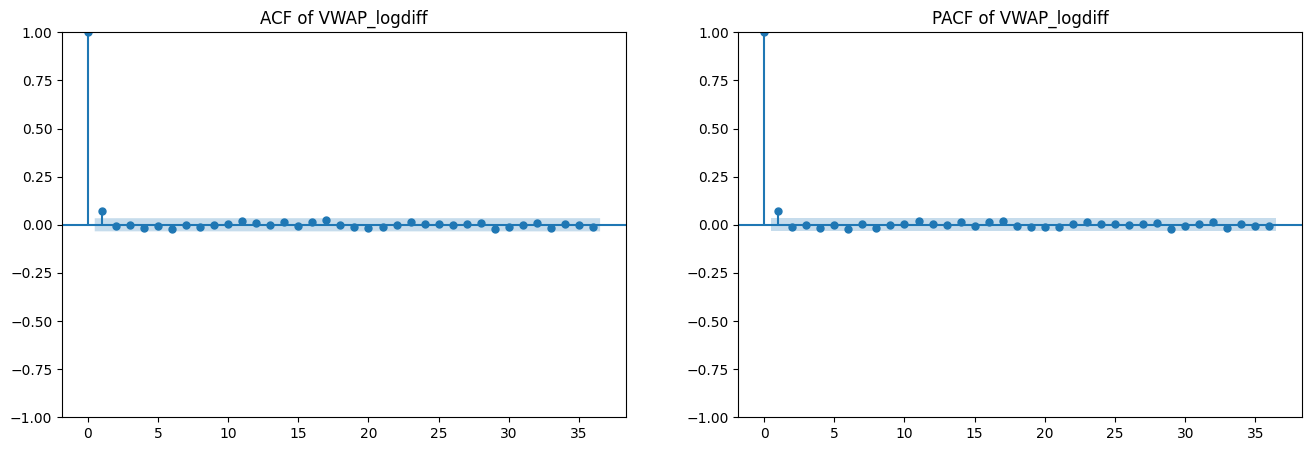

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

plot_acf(df['VWAP_logdiff'].dropna(), ax=axes[0])
axes[0].set_title('ACF of VWAP_logdiff')

plot_pacf(df['VWAP_logdiff'].dropna(), ax=axes[1])
axes[1].set_title('PACF of VWAP_logdiff')

plt.show()


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
To determine the hyperparameters (p, d, q), I first used the ADF test to identify the required level of differencing and selected d = 1. Then, using the PACF plot, I observed that only the first lag was significant, so I set p = 1. Similarly, from the ACF plot, the first lag was the only meaningful spike, leading to q = 1. Therefore, the optimal model chosen was ARIMA(1,1,1).        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
برای تعیین هایپرپارامترهای (p,d,q)، ابتدا با آزمون ADF مقدار تفاضل‌گیری لازم را تعیین کردم و d=1 انتخاب شد. سپس از نمودار PACF مقدار معنادار لگ اول را برای تعیین p=1 و از نمودار ACF لگ اول را برای تعیین q=1 استفاده کردم. بنابراین مدل بهینه ARIMA(1,1,1) انتخاب شد.</div>
</div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Three ARIMA models with different (p, d, q) configurations were fitted on the stationary series VWAP_logdiff, and their AIC, BIC, and Log-Likelihood values were compared to identify the best-performing model.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
سه مدل ARIMA با ترکیب‌های متفاوت (p,d,q) روی سری ایستا شده VWAP_logdiff فیت شد و با استفاده از معیارهای AIC، BIC و Log-Likelihood با هم مقایسه شدند تا بهترین مدل انتخاب شود</div>
</div>

In [27]:
import warnings
warnings.filterwarnings("ignore")


series = df['VWAP_logdiff']

models_to_test = [
    ("ARIMA(0,0,1)", (0,0,1)),
    ("ARIMA(1,1,1)", (1,1,1)),
    ("ARIMA(1,0,0)", (1,0,0))
]

results = []

for name, order in models_to_test:
    model = sm.tsa.ARIMA(series, order=order)
    res = model.fit()
    results.append([name, order, res.aic, res.bic, res.llf])

res_df = pd.DataFrame(results, columns=["Model", "Order", "AIC", "BIC", "LogLik"])
res_df


,Model,Order,AIC,BIC,LogLik
0,"ARIMA(0,0,1)","(0, 0, 1)","-12,884.26","-12,865.93","6,445.13"
1,"ARIMA(1,1,1)","(1, 1, 1)","-12,855.50","-12,837.17","6,430.75"
2,"ARIMA(1,0,0)","(1, 0, 0)","-12,883.94","-12,865.62","6,444.97"


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
Based on the AIC, BIC, and Log-Likelihood values, the ARIMA(0,0,1) model demonstrates the best performance and is selected as the optimal model.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
بر اساس مقادیر AIC، BIC ، مدل ARIMA(0,0,1) بهترین عملکرد را داشته و به‌عنوان مدل برتر انتخاب می‌شود. پس به نمایندگی از دو مدل دیگه، رو همین کار می‌کنیم
</div>
</div>

In [28]:
# train / test
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size].copy()
test  = df.iloc[train_size:].copy()

#log-transformed and differenced series
train['VWAP_log'] = np.log(train['VWAP'])
test['VWAP_log']  = np.log(test['VWAP'])

train['VWAP_logdiff'] = train['VWAP_log'].diff()
train_diff = train['VWAP_logdiff'].dropna()   


# fit model
model_ar = ARIMA(train_diff, order=(0, 0, 1))
model_fit_ar = model_ar.fit()
print(model_fit_ar.summary())


                               SARIMAX Results                                
Dep. Variable:           VWAP_logdiff   No. Observations:                 2656
Model:                 ARIMA(0, 0, 1)   Log Likelihood                4792.886
Date:                Sun, 23 Nov 2025   AIC                          -9579.772
Time:                        01:16:07   BIC                          -9562.118
Sample:                             0   HQIC                         -9573.382
                               - 2656                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.270      0.787      -0.003       0.002
ma.L1          0.0754      0.010      7.317      0.000       0.055       0.096
sigma2         0.0016   3.15e-06    503.344      0.0

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
This block reconstructs the in-sample ARIMA predictions by converting fitted log-differences back to the log level and then transforming them to the original VWAP scale.
        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
این بخش، پیش‌بینی‌های درون‌نمونه‌ای مدل ARIMA را با تبدیل مقادیر پیش‌بینی‌شده در فضای تفاضلِ لگ به سطح لگ و سپس بازگرداندن آن‌ها به مقیاس اصلی VWAP بازسازی می‌کند.
        </div>
</div>

In [29]:

# Predicted values in the log-differenced space
predictions_AR_diff = pd.Series(model_fit_ar.fittedvalues, copy=True)
print(predictions_AR_diff.head())

# Converting differenced predictions back to log-level via cumulative sum
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()

# Initial log value (first log(VWAP) in the training set)
start_log = train['VWAP_log'].iloc[0]

# Reconstructing the log(VWAP) series for the training period
predictions_AR_log = pd.Series(start_log, index=train_diff.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum, fill_value=0)

# Transforming back to the original VWAP scale
predictions_AR_train = np.exp(predictions_AR_log)


Date
2007-11-28   -0.00
2007-11-29   -0.00
2007-11-30   -0.00
2007-12-03    0.00
2007-12-04    0.00
dtype: float64


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
This block generates out-of-sample ARIMA forecasts by converting predicted log-differences into log levels and then transforming them back to the original VWAP scale for the test period.    
        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
این بخش پیش‌بینی‌های خارج‌از‌نمونه ARIMA را با تبدیل تفاضل‌های لگ پیش‌بینی‌شده به سطح لگ و سپس بازگرداندن آن‌ها به مقیاس اصلی VWAP برای دورهٔ آزمون تولید می‌کند.      
        </div>
</div>

In [30]:

steps = len(test)   # Number of forecast steps (length of the test set)

# Forecasting future log-differences
forecast_diff = model_fit_ar.forecast(steps=steps)

# Converting predicted differences to log levels via cumulative sum
forecast_diff_cumsum = forecast_diff.cumsum()
last_log = train['VWAP_log'].iloc[-1]    # Last log(VWAP) value in the training set

# Reconstructing forecasted log(VWAP)
forecast_log = last_log + forecast_diff_cumsum

# Converting forecasts back to the original VWAP scale
forecast_VWAP = np.exp(forecast_log)

# Align forecast index with the test set
forecast_VWAP.index = test.index


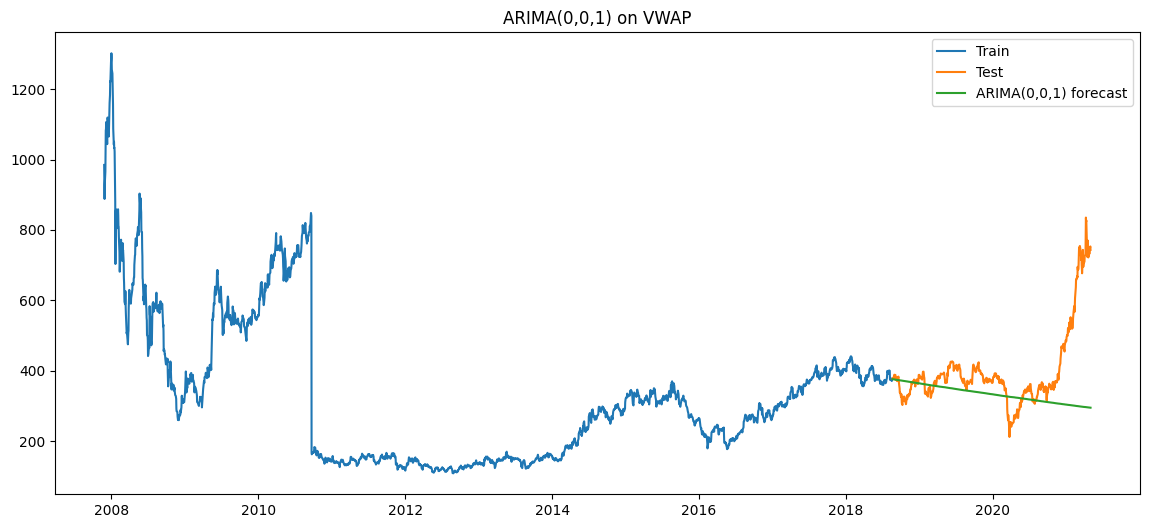

In [31]:
plt.figure(figsize=(14,6))
plt.plot(train['VWAP'], label='Train')
plt.plot(test['VWAP'],  label='Test')
plt.plot(forecast_VWAP, label='ARIMA(0,0,1) forecast')

plt.legend()
plt.title('ARIMA(0,0,1) on VWAP')
plt.show()


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Evaluation of Time Series Models
  </div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
This code evaluates the ARIMA model’s forecasting accuracy by comparing actual VWAP values with predicted values using RMSE, MAE, and MAPE metrics.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
در این بخش با مقایسهٔ مقادیر واقعی VWAP و مقادیر پیش‌بینی‌شده، سه شاخص RMSE و MAE و MAPE محاسبه می‌شود تا میزان دقت مدل ARIMA ارزیابی شود.
        </div>
</div>

In [32]:

y_true = test['VWAP']
y_pred = forecast_VWAP   # خروجی پیش‌بینی ARIMA(0,0,1)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 136.60182682030117
MAE: 78.41500107068622
MAPE: 16.15474845225876


<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
The results show that the ARIMA(0,0,1) model provides moderate accuracy; the relatively high RMSE and MAE indicate that the model cannot fully capture the sharp upward movements in VWAP, while the MAPE of about 16% reflects an overall acceptable performance for a financial time series.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
نتایج نشان می‌دهد مدل ARIMA(0,0,1) دقت متوسطی دارد؛ خطای RMSE و MAE نسبتاً بالا است که بیانگر ناتوانی مدل در دنبال‌کردن جهش‌های شدید قیمت است، اما مقدار MAPE حدود ۱۶٪ نشان می‌دهد عملکرد مدل برای سری‌های مالی قابل قبول و منطقی است.      
</div>
</div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
  <div style="background:#2563eb;color:#fff;padding:10px 14px;font-weight:700">
Conclusion
  </div>

<div dir="ltr" style="border-radius:12px;overflow:hidden;font-family:Vazirmatn, Segoe UI, Tahoma">
    <div style="border:1px solid #dbeafe;border-top:none;padding:12px 14px;color:#1f2937;line-height:1.9;background:#f8fbff">
The ARIMA(0,0,1) model did not produce an adequate forecast because ARIMA can only capture short-term linear patterns and cannot model strong upward trends, sudden jumps, or regime shifts commonly found in financial time series. Since the model was trained on the log-differenced series—which has a mean close to zero—it naturally reverts its predictions toward the historical mean, resulting in a nearly flat or slightly declining forecast line. Meanwhile, the test period contains a strong upward trend that ARIMA is unable to reproduce.        <div dir="rtl" style="text-align:right;">
      <strong>ترجمه فارسی:</strong><br>
مدل ARIMA(0,0,1) خروجی مناسبی تولید نکرد زیرا این مدل فقط قادر است الگوهای خطی و کوتاه‌مدت را مدل‌سازی کند و توانایی یادگیری روندهای شدید، جهش‌های ناگهانی و تغییر رژیم در داده‌های مالی را ندارد. از آنجا که مدل روی سری لگ–تفاضل (که میانگین نزدیک به صفر دارد) آموزش دیده است، پیش‌بینی آن به‌طور طبیعی به سمت میانگین گذشته برگشته و به شکل یک خط تقریباً صاف یا کمی کاهشی ظاهر شده است. در حالی که دورهٔ تست شامل یک روند صعودی قوی بوده که ARIMA قادر به بازتولید آن نیست.
</div>